<a href="https://colab.research.google.com/github/NetoScientist/DataSience/blob/main/Imersao__DIA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Irmersão dados **Alura**
Fonte: https://github.com/alura-cursos/imersao-dados-2-2020

## Importando bibliotecas


In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Definindo um estilo do Seaborn

In [196]:
sns.set_style("darkgrid")

## Seprando a fonte em variavel

In [197]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

## Importando para um data Frame

In [198]:
dados = pd.read_csv(fonte)

## Lendo os primeiras linhas


In [199]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


## Dicionário

In [200]:
genero = { 'M': 0, 'F':1}
estado_civil = {
      0:'não informado',
      1:'solteiro(a)',
      2:'casado(a)/união estável', 
      3:'divorciado(a)',
      4:'viúvo(a)'}
cor = {
    0: 'não declarado',
    1: 'branca',
    2: 'preta',
    3: 'parda',
    4: 'amarela',
    5: 'indígena'
}
nacionalidade = {
    0: 'não informado',
    1: 'brasileiro(a)',
    2: 'naturalizado(a)',
    3: 'estrangeiro(a)',
    4: 'brasileiro nascido no exterior'

}
conclusao = {
    1: 'ensino médio concluído',
    2: 'cursando, conclusão em 2019',
    3: 'cursando, conclusão após 2019',
    4: 'ensino médio não concluído e não cursando'
}
tipo_escola = {
    1: 'sem resposta', 
    2: 'pública',
    3: 'privada',
    4: 'exterior',
}

tipo_ensino = {
    1: 'regular',
    2: 'especial',
    3: 'EJA'
    
}
localizacao_escola = {
    1: 'urbana',
    2: 'rural'
}
tipo_presenca = {
    0:'faltou',
    1:'presente',
    2:'eliminado'
}
idioma_estrangeiro = {
    0: 'inglês',
    1: 'espanhol'
}

treineiro = {
    0: 'não',
    1: 'sim'
}

status_redacao = {
    1: 'sem problemas',
    2: 'anulada',
    3: 'cópia texto motivador',
    4: 'em branco',
    6: 'fuga ao tema',
    7: 'não atendimento ao tipo textual',
    8: 'texto insuficiente',
    9: 'parte desconectada'
}
#Q006 = Renda familiar de A a Q quanto maior mais alta a renda 
renda_familiar = {
    "A"	: "Nenhuma renda.",
    "B": 	"Até R$ 998,00.",
    "C":	"De R$ 998,01 até R$ 1.497,00.",
    "D":	"De R$ 1.497,01 até R$ 1.996,00.",
    "E":	"De R$ 1.996,01 até R$ 2.495,00.",
    "F":	"De R$ 2.495,01 até R$ 2.994,00.",
    "G":	"De R$ 2.994,01 até R$ 3.992,00.",
    "H":	"De R$ 3.992,01 até R$ 4.990,00.",
    "I":  "De R$ 4.990,01 até R$ 5.988,00.",
    "J":	"De R$ 5.988,01 até R$ 6.986,00.",
    "K":	"De R$ 6.986,01 até R$ 7.984,00.",
    "L":	"De R$ 7.984,01 até R$ 8.982,00.",
    "M":  "De R$ 8.982,01 até R$ 9.980,00.",
    "N":	"De R$ 9.980,01 até R$ 11.976,00.",
    "O":	"De R$ 11.976,01 até R$ 14.970,00.",
    "P":  "De R$ 14.970,01 até R$ 19.960,00.",
    "Q": 	"Mais de R$ 19.960,00."
}

## Serpando as colunas das provas e usando o describe


In [201]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


## Desafios

### Desafio 01: Proporção dos inscritos por idade.

In [202]:
#Usando normalize para saber a proporção de incrito por idade
dados['NU_IDADE'].value_counts(normalize=True).sort_index() * 100

13     0.003140
14     0.110692
15     1.577171
16     6.146962
17    16.687078
        ...    
73     0.001570
75     0.001570
76     0.000785
77     0.000785
82     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

### Desafio 02: Descobrir de quais estados são os inscritos com 13 anos.

In [203]:
dados.query('NU_IDADE == 13')['SG_UF_RESIDENCIA']

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

### Desafio03: Adicionar título no gráfico

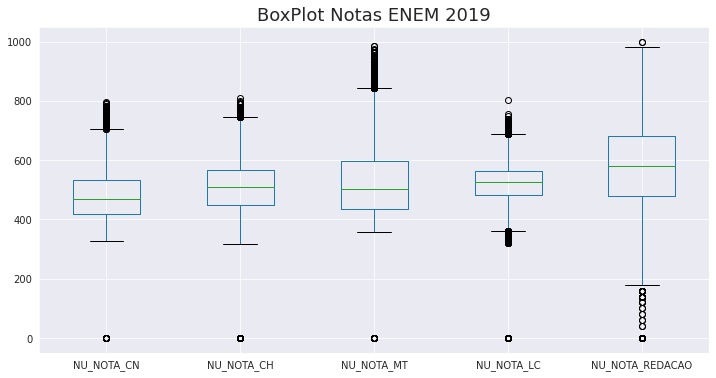

In [204]:
dados[provas].boxplot(grid=True, figsize=(12,6)).set_title('BoxPlot Notas ENEM 2019', fontsize=18);

### Desafio 04: Plotar os Histogramas das idades dos do treineiro e não treineiros.

In [205]:
plt.figure(figsize=(10,8))
ax= plt.hist

<Figure size 720x576 with 0 Axes>

In [206]:
cross = pd.crosstab(index=dados['NU_IDADE'], columns=dados['IN_TREINEIRO'])
cross

IN_TREINEIRO,0,1
NU_IDADE,,
13,4,0
14,77,64
15,82,1927
16,688,7142
17,16355,4901
...,...,...
73,2,0
75,2,0
76,1,0


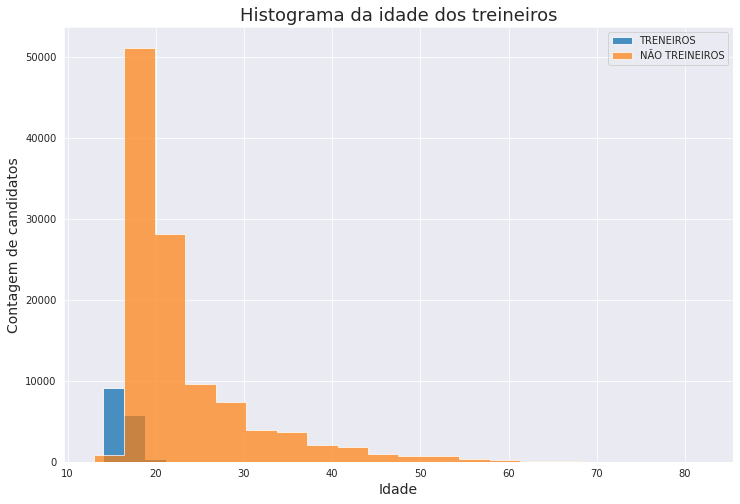

In [241]:
#Treneiros 
treineiros_yes = dados[dados['IN_TREINEIRO'] == 1]
treineiros_no =  dados[dados['IN_TREINEIRO'] == 0]
plt.figure(figsize=(12,8))
plt.title('Histograma da idade dos treineiros', fontsize=18);
ax = plt.hist(treineiros_yes.NU_IDADE, bins=20, histtype='stepfilled', alpha=0.8, label='TRENEIROS')
plt.legend(loc=1)
ax = plt.hist(treineiros_no.NU_IDADE, bins=20, histtype='stepfilled', alpha=0.7, label='NÃO TREINEIROS')
plt.legend(loc=1)
plt.xlabel("Idade", fontsize=14)
plt.ylabel("Contagem de candidatos", fontsize=14)
plt.show()


### Desafio 05: Comparar as distribuições das provas em inglês espanhol

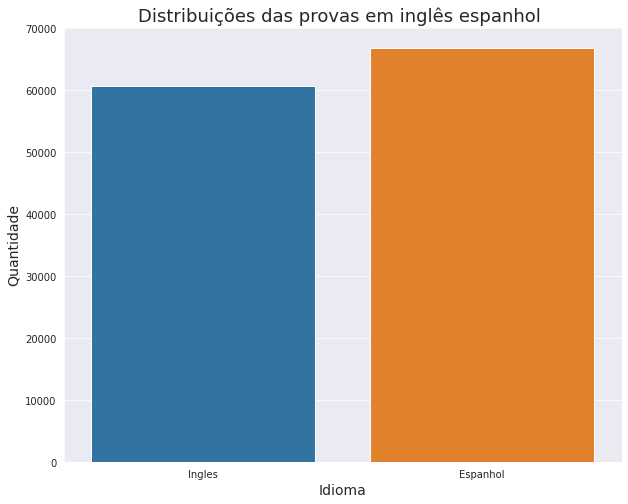

In [209]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x=dados['TP_LINGUA'])
ax.set_xticklabels(['Ingles', 'Espanhol'])
ax.set_title('Distribuições das provas em inglês espanhol ', fontsize=18)
ax.set_xlabel('Idioma', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14);

### Desafio 06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

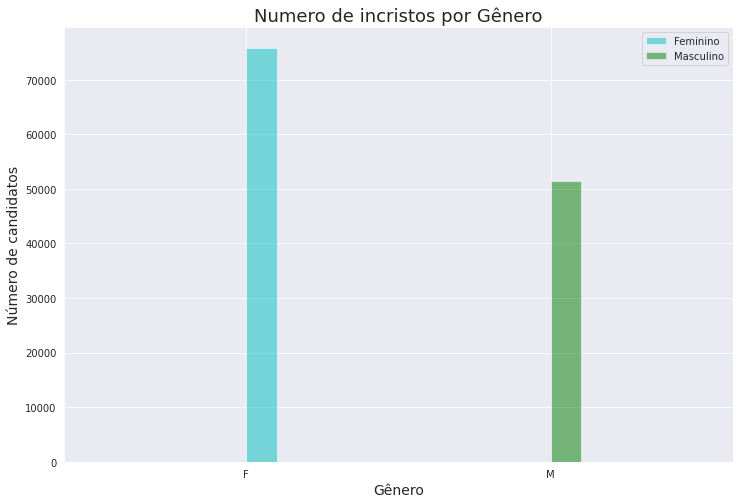

In [238]:
plt.figure(figsize=(12,8))
plt.title('Numero de incristos por Gênero', fontsize=18);

ax = plt.hist(dados.query('TP_SEXO == "F"').TP_SEXO, alpha=0.5, label='Feminino', color='c')
plt.legend(loc=1)

ax = plt.hist(dados.query('TP_SEXO == "M"').TP_SEXO, alpha=0.5, label='Masculino', color='g')
plt.legend(loc=1)

plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Número de candidatos', fontsize=14)

plt.show()

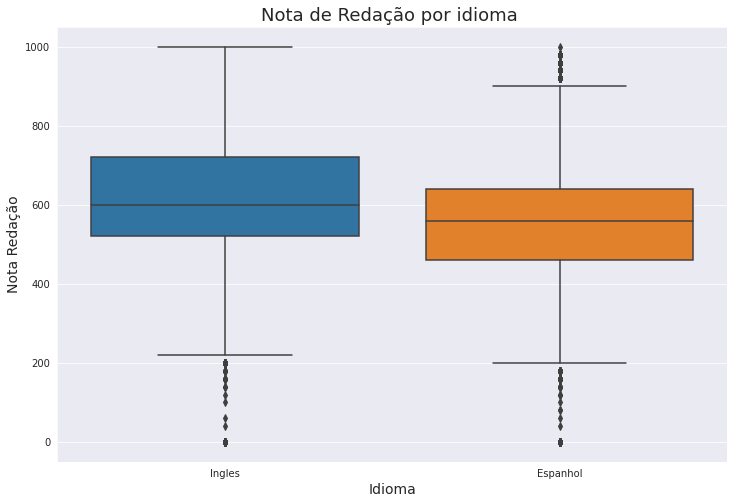

In [211]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='TP_LINGUA', y='NU_NOTA_REDACAO', data=dados)
ax.set_xticklabels(['Ingles', 'Espanhol'])
ax.set_title('Nota de Redação por idioma ', fontsize=18)
ax.set_xlabel('Idioma', fontsize=14)
ax.set_ylabel('Nota Redação', fontsize=14);